In [25]:
import pandas as pd # Importación de la librería
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from math import dist
from apyori import apriori


df = pd.read_csv('https://gitlab.com/renaxx12/mineria-de-datos/-/raw/main/fetal_health.csv?ref_type=heads')

df # Mostrar la data antes de los cambios

baseline value  accelerations  fetal_movement  uterine_contractions  \
0              120.0          0.000           0.000                 0.000   
1              132.0          0.006           0.000                 0.006   
2              133.0          0.003           0.000                 0.008   
3              134.0          0.003           0.000                 0.008   
4              132.0          0.007           0.000                 0.008   
...              ...            ...             ...                   ...   
2121           140.0          0.000           0.000                 0.007   
2122           140.0          0.001           0.000                 0.007   
2123           140.0          0.001           0.000                 0.007   
2124           140.0          0.001           0.000                 0.006   
2125           142.0          0.002           0.002                 0.008   

      light_decelerations  severe_decelerations  prolongued_decelerations  \
0                   0.000                   0.0                       0.0   
1                   0.003                   0.0                       0.0   
2                   0.003                   0.0                       0.0   
3                   0.003                   0.0                       0.0   
4                   0.000                   0.0                       0.0   
...                   ...                   ...                       ...   
2121                0.000                   0.0                       0.0   
2122                0.000                   0.0                       0.0   
2123                0.000                   0.0                       0.0   
2124                0.000                   0.0                       0.0   
2125                0.000                   0.0                       0.0   

      abnormal_short_term_variability  mean_value_of_short_term_variability  \
0                                73.0                                   0.5   
1                                17.0                                   2.1   
2                                16.0                                   2.1   
3                                16.0                                   2.4   
4                                16.0                                   2.4   
...                               ...                                   ...   
2121                             79.0                                   0.2   
2122                             78.0                                   0.4   
2123                             79.0                                   0.4   
2124                             78.0                                   0.4   
2125                             74.0                                   0.4   

      percentage_of_time_with_abnormal_long_term_variability  ...  \
0                                                  43.0       ...   
1                                                   0.0       ...   
2                                                   0.0       ...   
3                                                   0.0       ...   
4                                                   0.0       ...   
...                                                 ...       ...   
2121                                               25.0       ...   
2122                                               22.0       ...   
2123                                               20.0       ...   
2124                                               27.0       ...   
2125                                               36.0       ...   

      histogram_min  histogram_max  histogram_number_of_peaks  \
0              62.0          126.0                        2.0   
1              68.0          198.0                        6.0   
2              68.0          198.0                        5.0   
3              53.0          170.0                       11.0   
4              53.0          170.0                   

In [26]:
X =df.drop(['fetal_health'], axis=1) # Se guarda la data de atributos en una variable llamada "X", este guarda las columnas con los nombres que están en la vaiable "atributo_columnas"
Y=df['fetal_health']
normalizer = Normalizer()
X = normalizer.fit_transform(df)
dataset = X

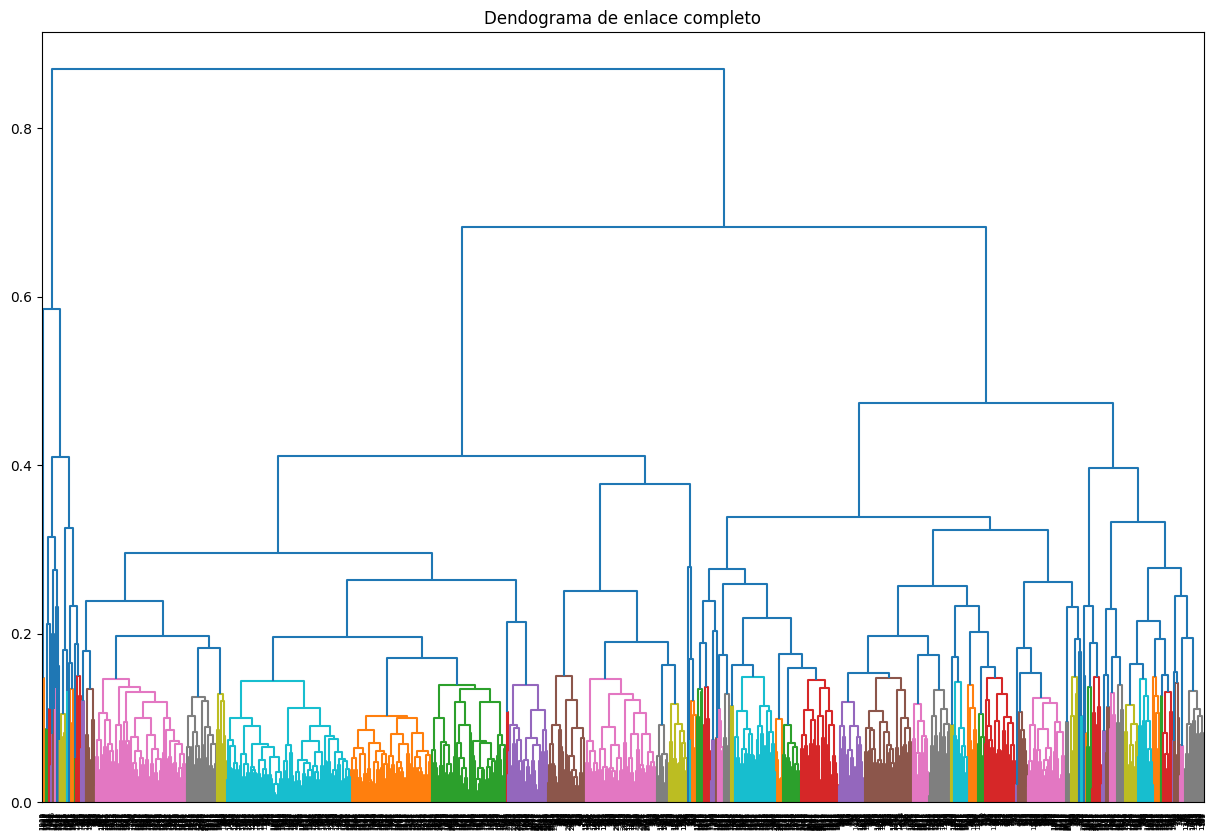

In [27]:
def clustering_jerarquico(n, enlace, datos):
    # se crea la instancia
    clustering = AgglomerativeClustering(n_clusters = n, linkage = enlace).fit(datos)
    clustering
    AgglomerativeClustering()

    enlace = clustering.labels_ #proporciona las etiquetas de clúster asignadas a cada punto de datos en el conjunto de datos.
    return enlace

#funcion para hacer el dendograma
def visualizar_jerarquico(enlace, datos, titulo,umbral):
    # figura
    plt.rcParams["figure.figsize"] = (15,10)
    #se crea el dendograma, donde se le da la metrica, el color y la mandera de truncado
    dendograma = sch.dendrogram(sch.linkage(datos, method = enlace, metric='euclidean'),
                                color_threshold=umbral, truncate_mode="level")
    plt.title(titulo)

#Se manda el tipo de dendograma, el dataset, titulo y 0.1 la forma que hace mas cluster
visualizar_jerarquico("complete", dataset, "Dendograma de enlace completo",0.15)


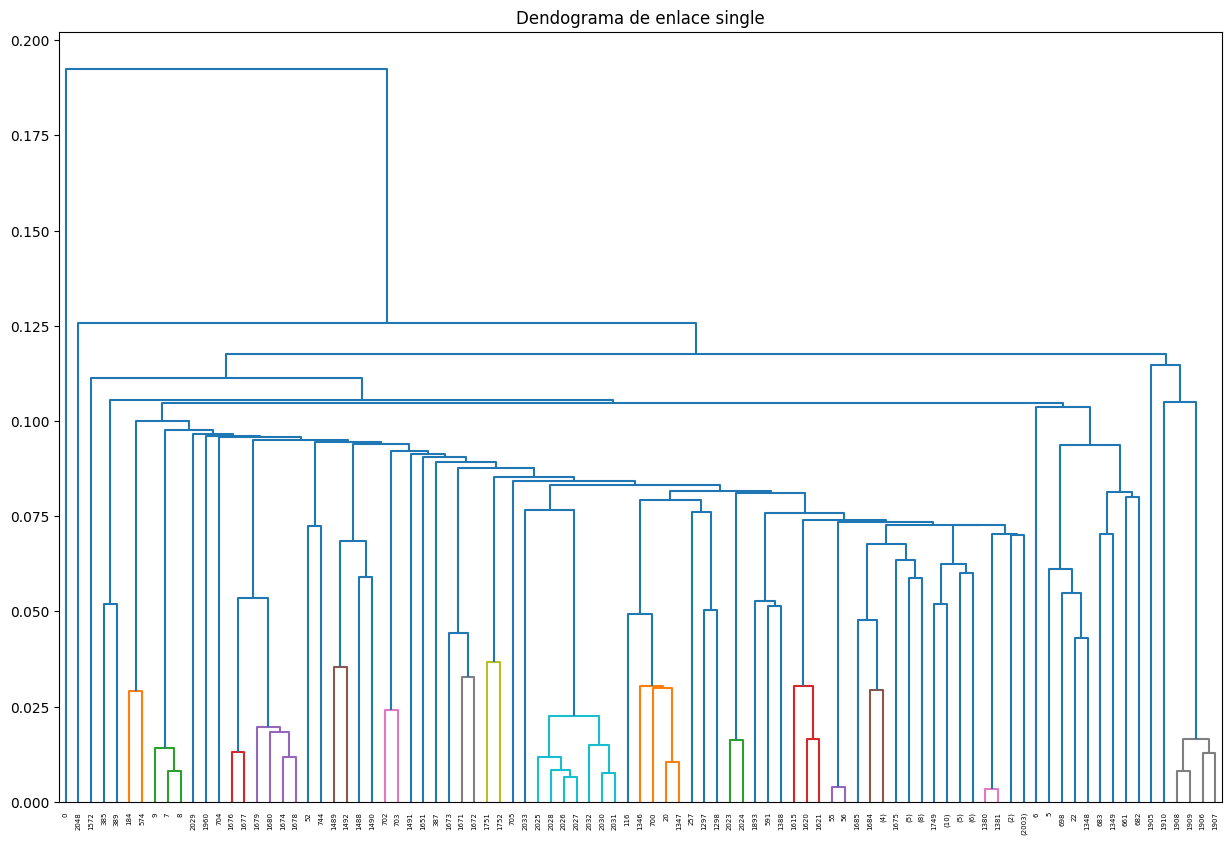

In [28]:
visualizar_jerarquico("single", dataset, "Dendograma de enlace single",0.04)

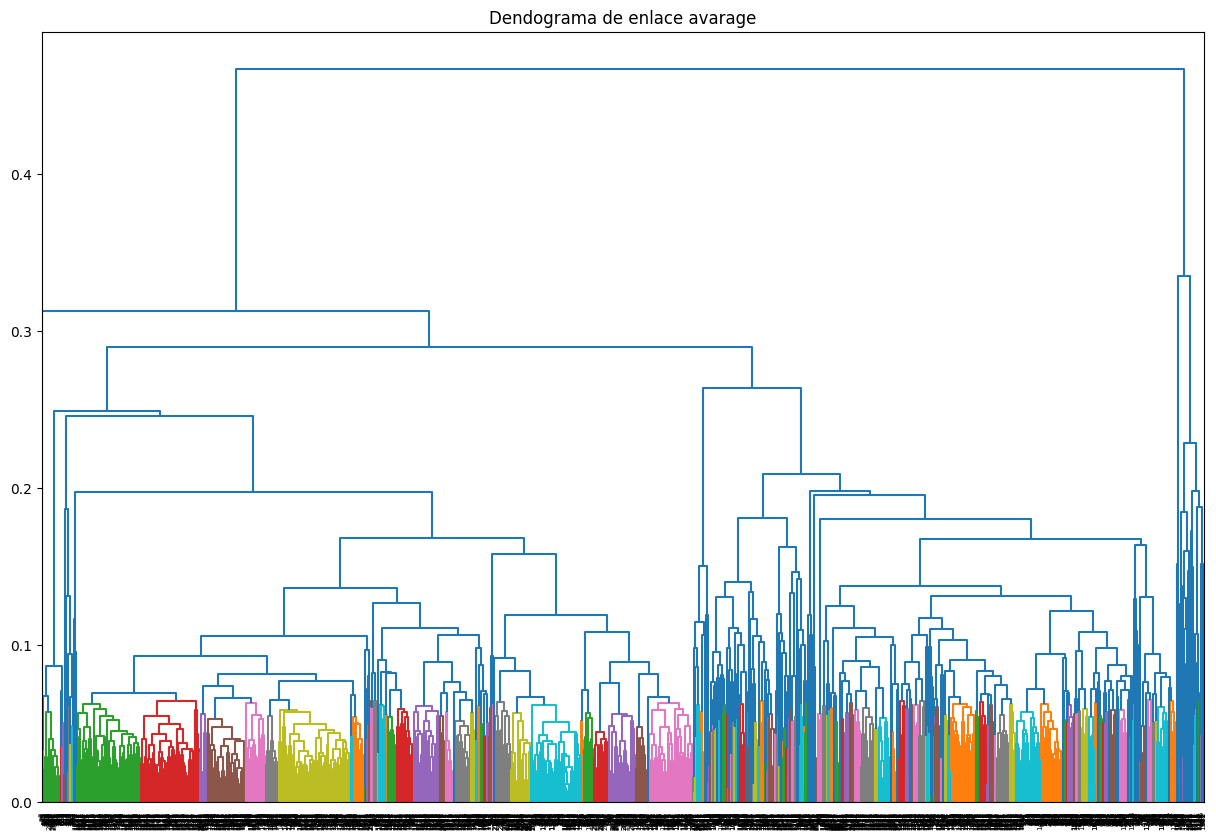

In [29]:
visualizar_jerarquico("average", dataset, "Dendograma de enlace avarage",0.065)

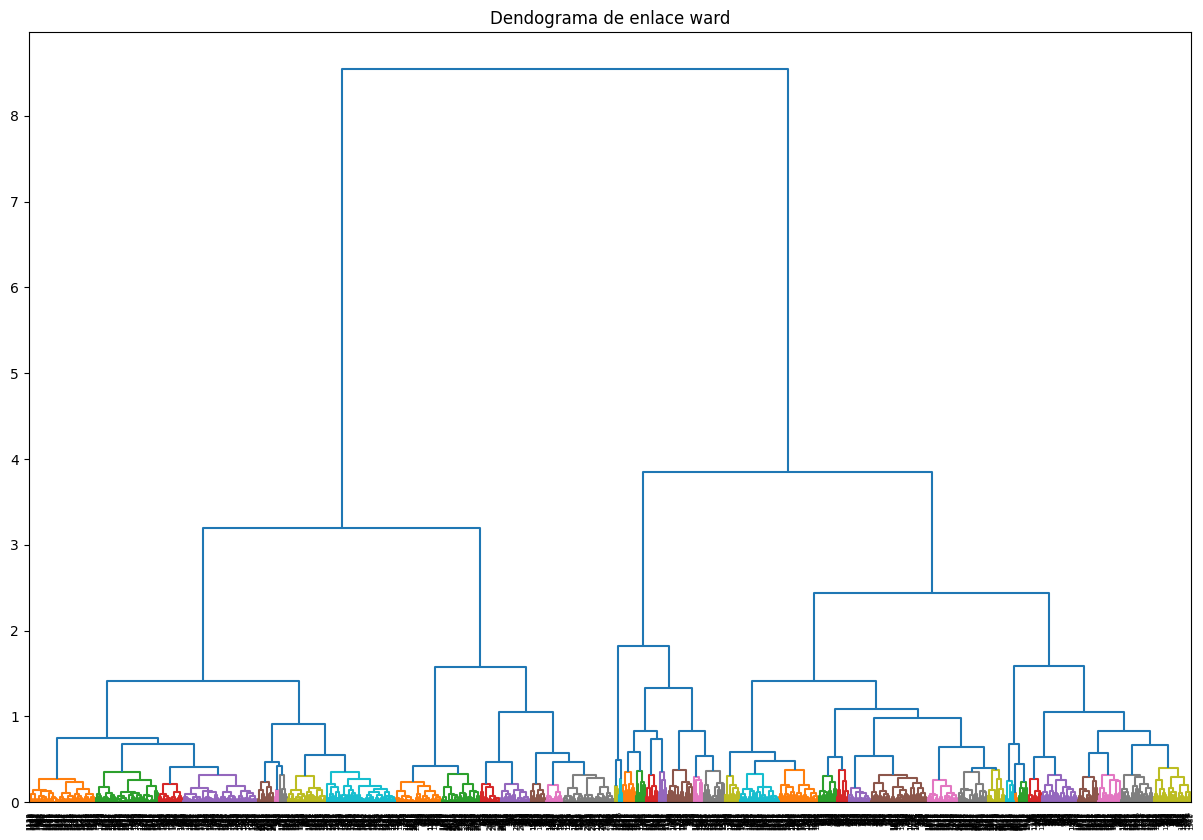

In [30]:
visualizar_jerarquico("ward", dataset, "Dendograma de enlace ward", 0.4)

k-means

In [31]:
def clustering_kmeans(n_clusters):
    # Creación modelo
    particion = KMeans(n_clusters)

    # Aplicación en base de datos
    particion.fit(dataset)

    return particion


In [32]:
# Cálculo de centroides
def calculo_centroides(particion):
    centroides = particion.cluster_centers_
    return centroides

In [33]:
# Cálculo de distancia entre los centroides
def distancia_centroides(cent, k):
    aux = 1
    k = k + 1

    for i in range(0, k):
        for j in range(aux, k):
            distancia = dist(cent[i], cent[j])
            print("Distancia entre " + str(i) + ' y '+  str(j) + ': ' + str(distancia))
        aux = aux + 1

In [34]:
# Separación del dataset para cada uno de los clústers
def sep_data(lung_data, k):
    filtro = lung_data.loc[lung_data.KMeans_clusters == k]

    return filtro

In [35]:
# Creación arreglo que contine todas las distancias entre los centroides y los ejemplos.
def crear_arreglo(largo, centroide, k):
    arreglo_distancias = []
    aux = largo + 1

    for i in range(0, aux):
        # Distancia entre los ejemplos y el centroide
        arreglo_distancias.append(dist(centroide[k], dataset[i]))
    return arreglo_distancias

In [36]:
# Gráfico de barras para mostrar frecuencias de los clústers.
def grafico_frecuencia(arreglo_largos, k):
    eje_x = []

    for i in range(0, k + 1):
        eje_x.append(str(i))

    fig = plt.figure()

    ax = fig.add_subplot(111)
    ax.bar(range(len(arreglo_largos)),arreglo_largos)

    ax.set_xticks(range(len(arreglo_largos)))

    ax.set_xticklabels(eje_x)

    plt.xlabel("Grupos")
    plt.ylabel("Cantidad de Ejemplos")
    plt.title("Frecuencia de Ejemplos")

    plt.show()

In [37]:
#Se asigna K=2
kmeans_3 = clustering_kmeans(3)

In [38]:
# Se crear un dataframe con los datos

Kmeans3 = pd.DataFrame(dataset)

# Se agrega columna que contiene el cluster al que pertenecen los objetos
Kmeans3['KMeans_clusters'] = kmeans_3.labels_

Kmeans3.head()

0         1    2         3         4    5    6         7         8  \
0  0.382259  0.000000  0.0  0.000000  0.000000  0.0  0.0  0.232541  0.001593   
1  0.357001  0.000016  0.0  0.000016  0.000008  0.0  0.0  0.045977  0.005680   
2  0.360378  0.000008  0.0  0.000022  0.000008  0.0  0.0  0.043354  0.005690   
3  0.386936  0.000009  0.0  0.000023  0.000009  0.0  0.0  0.046201  0.006930   
4  0.381063  0.000020  0.0  0.000023  0.000000  0.0  0.0  0.046189  0.006928   

          9  ...        13        14        15        16        17        18  \
0  0.136976  ...  0.401372  0.006371  0.000000  0.382259  0.436412  0.385444   
1  0.000000  ...  0.535502  0.016227  0.002705  0.381342  0.367819  0.378638   
2  0.000000  ...  0.536503  0.013548  0.002710  0.382055  0.365797  0.373926   
3  0.000000  ...  0.490889  0.031763  0.000000  0.395599  0.386936  0.395599   
4  0.000000  ...  0.490763  0.025982  0.000000  0.395497  0.392610  0.398384   

         19        20        21  KMeans_clusters  
0  0.232541  0.003185  0.006371                1  
1  0.032455  0.000000  0.002705                1  
2  0.035225  0.000000  0.002710                1  
3  0.037539  0.002888  0.002888                1  
4  0.031755  0.002887  0.002887                1  

[5 rows x 23 columns]

In [39]:
# Cálculo de centroides
centroides_3 = calculo_centroides(kmeans_3)
print(centroides_3)

[[ 3.87695017e-01  6.85208031e-06  9.65959385e-06  1.17096059e-05
   7.48387175e-07  4.13590306e-23  5.52977710e-08  1.44293609e-01
   2.49674658e-03  4.70017994e-02  2.24932528e-02  1.04013716e-01
   3.43601681e-01  4.47615397e-01  6.18195334e-03  3.90460626e-04
   4.02686446e-01  4.00056731e-01  4.05126638e-01  1.03351697e-02
   5.10724450e-04  3.81308305e-03]
 [ 3.83271351e-01  1.16269068e-05  3.10637088e-05  1.27745747e-05
   8.17611521e-06 -1.65436123e-24  3.14118787e-07  1.27162977e-01
   4.46895102e-03  1.19285392e-02  2.72876050e-02  2.73878250e-01
   2.09275344e-01  4.83153594e-01  1.56062416e-02  1.29382607e-03
   3.99395848e-01  3.87765992e-01  3.99408144e-01  5.46438712e-02
   1.68637878e-03  3.28022760e-03]
 [ 3.66767967e-01  8.64145914e-06  8.16415240e-05  1.59666759e-05
   1.58220608e-05  8.59743017e-08  2.57186735e-06  1.23643753e-01
   7.20118949e-03  3.12095456e-03  1.73963570e-02  3.52763231e-01
   1.68668620e-01  5.21431851e-01  2.02844773e-02  1.86474452e-03
   3.4

In [40]:
# Cálculo distancia a centroides
distancia_centroides(centroides_3, 2)

Distancia entre 0 y 1: 0.22799051939848655
Distancia entre 0 y 2: 0.39066735701657435
Distancia entre 1 y 2: 0.20748669448790888


In [41]:
# Clúster cero

# Separación de los atributos del grupo
cluster0_Kmeans3 = sep_data(Kmeans3, 0)

# Cálculo cantidad de ejemplos
largo_C0_K3 = len(cluster0_Kmeans3.index)

# Creación arreglo con distancias entre centroide y ejemplos
arreglo_C0_K3 = crear_arreglo(largo_C0_K3, centroides_3, 0)

In [42]:
# Clúster dos

# Separación de los atributos del grupo
cluster2_Kmeans3 = sep_data(Kmeans3, 2)

# Cálculo cantidad de ejemplos
largo_C2_K3 = len(cluster2_Kmeans3.index)

# Creación arreglo con distancias entre centroide y ejemplos
arreglo_C2_K3 = crear_arreglo(largo_C2_K3, centroides_3, 2)

In [43]:
# Clúster uno

# Separación de los atributos del grupo
cluster1_Kmeans3 = sep_data(Kmeans3, 1)

# Cálculo cantidad de ejemplos
largo_C1_K3 = len(cluster1_Kmeans3.index)

# Creación arreglo con distancias entre centroide y ejemplos
arreglo_C1_K3 = crear_arreglo(largo_C1_K3, centroides_3, 1)

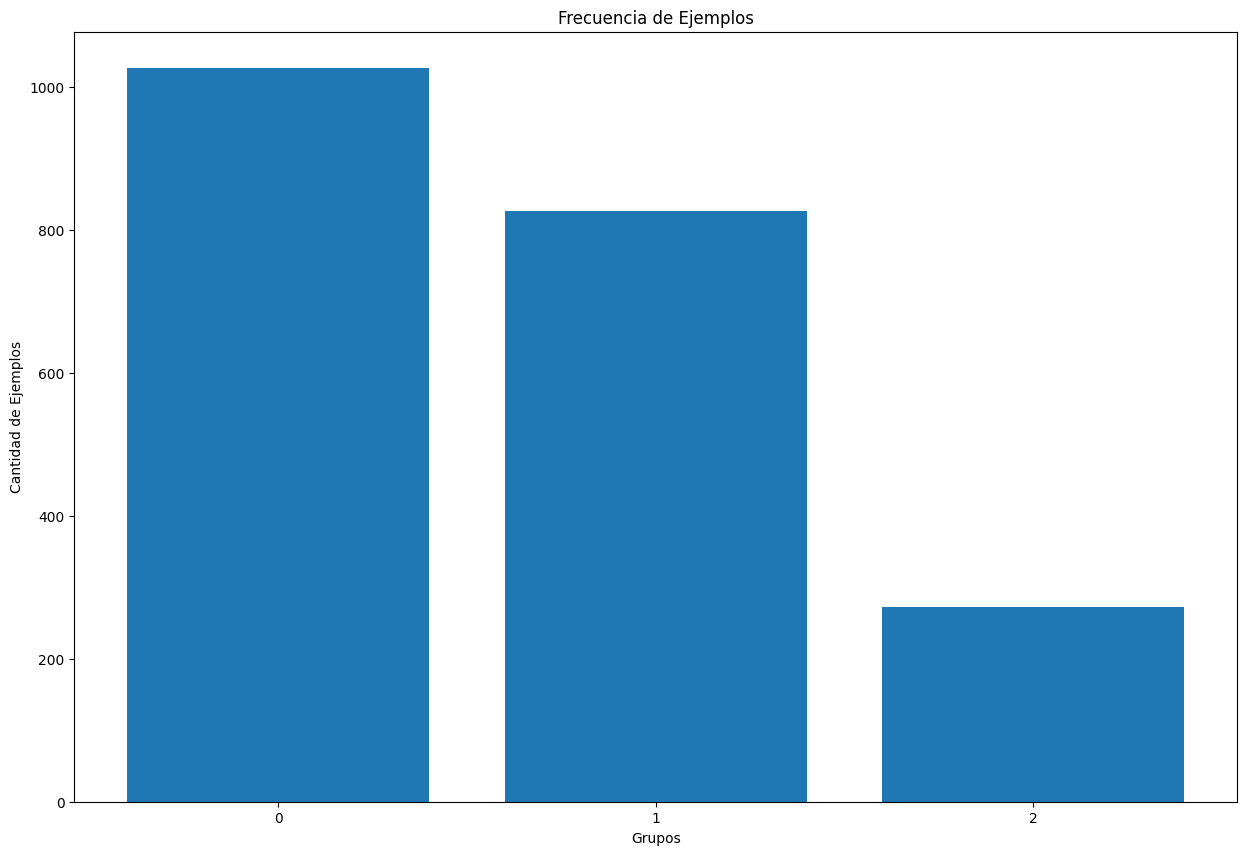

In [44]:
# Gráfico de Frecuencia de los clústers.

# Creación arreglo.
array = []

# Se insertan los ejemplos por cada grupo.
array.append(largo_C0_K3)
array.append(largo_C1_K3)
array.append(largo_C2_K3)

# Llamado a función para fraficar.
grafico_frecuencia(array, 2)

In [45]:
from sklearn.model_selection import train_test_split

class_column = 'fetal_health'
df_train, df_test = train_test_split(df, test_size=0.3, stratify=df[class_column], random_state=0)
print("Distribución en el conjunto de entrenamiento:")
print(df_train[class_column].value_counts())

print("\nDistribución en el conjunto de prueba:")
print(df_test[class_column].value_counts())

Distribución en el conjunto de entrenamiento:
fetal_health
1.0    1158
2.0     207
3.0     123
Name: count, dtype: int64

Distribución en el conjunto de prueba:
fetal_health
1.0    497
2.0     88
3.0     53
Name: count, dtype: int64


In [46]:
num_records = len(df_test)
print(num_records)
records = []  
for i in range(0, num_records):  
    records.append([str(df_test.values[i,j]) for j in range(0, 20)])

association_rules = apriori(records, min_support = 0.003, min_confidence = 0.2, min_lift = 3, min_length = 2)
association_results = list(association_rules)
print(len(association_results))

638


KeyboardInterrupt: 